# Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gmean
import os
import glob

## Load Data

In [2]:
control_path = "Metrics/Manip/Control"
control_files = glob.glob(os.path.join(control_path, '*.csv'))
control_individual = {}
for f in control_files:
    control_individual[f.split('/')[-1].split('.')[0]] = pd.read_csv(f)
control_population = pd.concat(control_individual.values())
control_population

experiment_path = "Metrics/Manip/Experiment"
experiment_files = glob.glob(os.path.join(experiment_path, '*.csv'))
experiment_individual = {}
for f in experiment_files:
    experiment_individual[f.split('/')[-1].split('.')[0]] = pd.read_csv(f)
experiment_population = pd.concat(experiment_individual.values())
control_population

,times,grabcounts,completed
0,338,27,5
1,34,6,5
2,23,2,5
3,43,7,5
4,35,6,5
0,72,3,7
1,31,3,7
2,38,3,7
3,22,2,7
4,17,2,7


## Population Distribution of Times

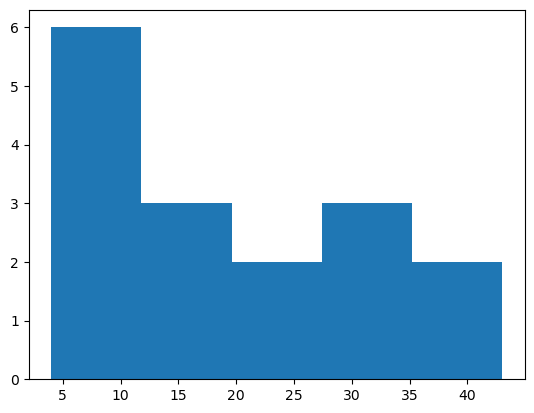

In [3]:
plt.hist(control_population.loc[[n for n in range(1, 5)]]['times'], bins=5)
plt.savefig(os.path.join(control_path, 'times.png'))
plt.show()

In [4]:
control_population.loc[[n for n in range(1, 5)]]['times'].mean()

np.float64(20.1875)

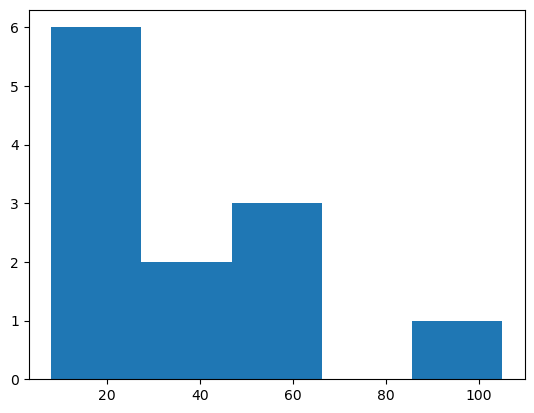

In [5]:
plt.hist(experiment_population.loc[[n for n in range(1, 5)]]['times'], bins=5)
plt.savefig(os.path.join(experiment_path, 'times.png'))
plt.show()

In [6]:
experiment_population.loc[[n for n in range(1, 5)]]['times'].mean()

np.float64(35.583333333333336)

## Population Distribution of Grab Counts

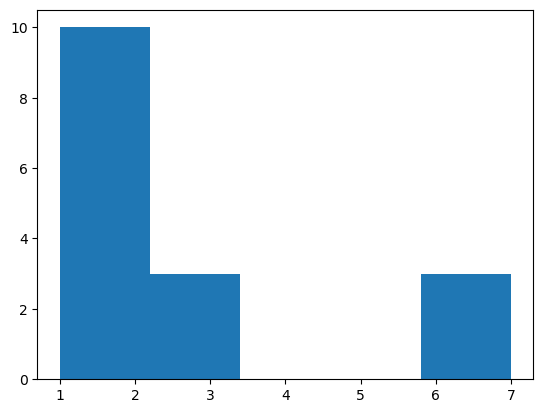

In [7]:
plt.hist(control_population.loc[[n for n in range(1, 5)]]['grabcounts'], bins=5)
plt.savefig(os.path.join(control_path, 'grabs.png'))
plt.show()

In [8]:
control_population.loc[[n for n in range(0, 5)]]['grabcounts'].mean()

np.float64(4.0)

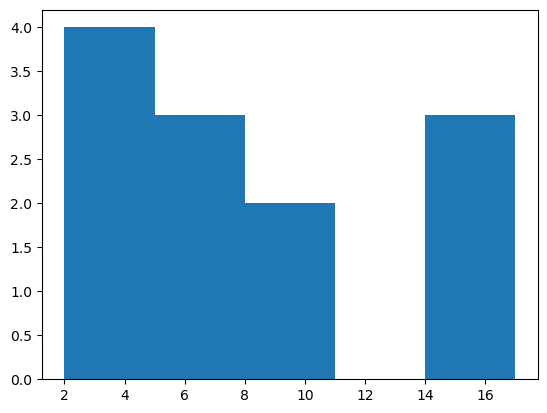

In [9]:
plt.hist(experiment_population.loc[[n for n in range(1, 5)]]['grabcounts'], bins=5)
plt.savefig(os.path.join(experiment_path, 'grabs.png'))
plt.show()

In [10]:
experiment_population.loc[[n for n in range(1, 5)]]['grabcounts'].mean()

np.float64(7.75)

## Population Means

In [11]:
means = pd.DataFrame({
    'control': [
        control_population.loc[[n for n in range(1, 5)]]['times'].mean(),
        control_population.loc[[n for n in range(1, 5)]]['grabcounts'].mean(),
        control_population.loc[[n for n in range(1, 5)]]['times'].std(),
        control_population.loc[[n for n in range(1, 5)]]['grabcounts'].std()
    ],
    'experiment': [
        experiment_population.loc[[n for n in range(1, 5)]]['times'].mean(),
        experiment_population.loc[[n for n in range(1, 5)]]['grabcounts'].mean(),
        experiment_population.loc[[n for n in range(1, 5)]]['times'].std(),
        experiment_population.loc[[n for n in range(1, 5)]]['grabcounts'].std()
    ]
}, index=['time mean', 'grabs mean', 'time stddev', 'grabs stddev'])

In [12]:
means.to_csv("means.csv")